In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

from sklearn.decomposition import PCA

import cltrier_nlp as nlp

In [2]:
CORPUS_FILE: str = './data/corpus.txt'
BATCH_SIZE: int = 80

In [3]:
corpus = nlp.corpus.Corpus.from_txt(CORPUS_FILE)

In [4]:
encoder = nlp.encoder.Encoder()
pooler = nlp.encoder.EncoderPooler()

In [6]:
batch: dict = {
    'x': [sent.raw for sent in corpus.sentences[:BATCH_SIZE]],
    'y': [sent.language for sent in corpus.sentences[:BATCH_SIZE]],
}

In [7]:
encodes = encoder(batch['x'])
encodes.model_dump().keys()

dict_keys(['embeds', 'token', 'input_ids', 'token_type_ids', 'attention_mask', 'offset_mapping', 'unpad'])

In [8]:
embeds: np.ndarray = PCA(n_components=2).fit_transform(
    np.stack([embed.detach().numpy() for embed in pooler(encodes, form="sent_cls")])
)

In [9]:
data = pd.DataFrame(
    [(emb[0], emb[1], lang) for emb, lang in zip(embeds, batch["y"])], 
    columns=["x", "y", "lang"]
)
data

,x,y,lang
0,-1.922642,-0.981804,german
1,7.607730,-0.230768,english
2,7.146054,1.213350,english
3,-0.483143,3.153280,english
4,-2.869485,-0.937774,german
...,...,...,...
75,6.994867,1.269254,english
76,-3.065395,2.756530,german
77,-2.891621,-0.781219,german
78,-2.844233,1.753359,german


<Axes: xlabel='x', ylabel='y'>

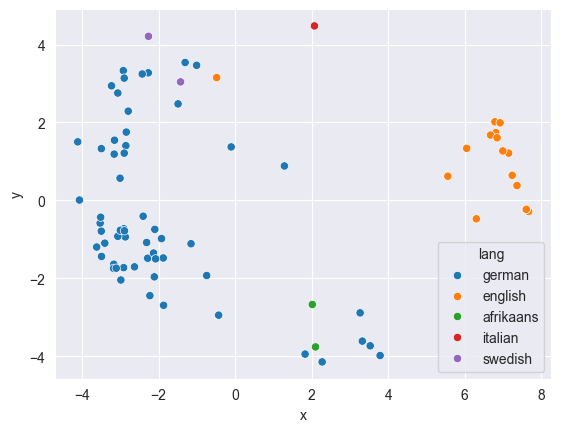

In [10]:
sns.scatterplot(data, x='x', y='y', hue='lang')